## Imports

In [21]:
#import de pacotes:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import box
import contextily as ctx
import seaborn as sns
from shapely.geometry import Polygon
print("teste")

teste


# First Look of the Data

### Finding out the file type

In [2]:
caminho_pasta = 'C:/Users/vinif/OneDrive/Área de Trabalho/EDA/DataBase'
arquivos = os.listdir(caminho_pasta)
print(arquivos)

['NY-House-Dataset.csv']


In [3]:
caminho_csv = 'C:/Users/vinif/OneDrive/Área de Trabalho/EDA/DataBase/NY-House-Dataset.csv'

df = pd.read_csv(caminho_csv, sep=',')
print(df.head(1))

                                   BROKERTITLE            TYPE   PRICE  BEDS  \
0  Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale  315000     2   

   BATH  PROPERTYSQFT               ADDRESS               STATE  \
0   2.0        1400.0  2 E 55th St Unit 803  New York, NY 10022   

                             MAIN_ADDRESS ADMINISTRATIVE_AREA_LEVEL_2  \
0  2 E 55th St Unit 803New York, NY 10022             New York County   

   LOCALITY SUBLOCALITY       STREET_NAME        LONG_NAME  \
0  New York   Manhattan  East 55th Street  Regis Residence   

                                   FORMATTED_ADDRESS   LATITUDE  LONGITUDE  
0  Regis Residence, 2 E 55th St #803, New York, N...  40.761255 -73.974483  


## In the SQL SERVER:
:
### I used these codes to create the dataBase and create the table:

#### Creating the DataBase:
CREATE DATABASE New_York_Houses

#### Creating the table:
USE New_York_Houses

CREATE TABLE Houses (
    
    ID INT IDENTITY(1,1) PRIMARY KEY,
    BROKERTITLE NVARCHAR(255),
    TYPE NVARCHAR(255),
    PRICE DECIMAL(18, 2),
    BEDS INT,
    BATH FLOAT,
    PROPERTYSQFT FLOAT,
    ADDRESS NVARCHAR(255),
    STATE NVARCHAR(255),
    MAIN_ADDRESS NVARCHAR(255),
    ADMINISTRATIVE_AREA_LEVEL_2 NVARCHAR(255),
    LOCALITY NVARCHAR(255),
    SUBLOCALITY NVARCHAR(255),
    STREET_NAME NVARCHAR(255),
    LONG_NAME NVARCHAR(255),
    FORMATTED_ADDRESS NVARCHAR(MAX),
    LATITUDE FLOAT,
    LONGITUDE FLOAT
);


# Upload the CSV dataset to a pandas DataFrame and Integrating the SQL with Python

In [31]:
NY_Houses_csv = 'C:/Users/vinif/OneDrive/Área de Trabalho/EDA/DataBase/NY-House-Dataset.csv'
df = pd.read_csv(NY_Houses_csv, sep=',')

# conectando o SQL
dados_conexao = (
    "Driver={SQL Server};"
    "Server=localhost\\SQLEXPRESS;"
    "Database=New_York_Houses;"
    "Trusted_Connection=yes;"
)

conexao = pyodbc.connect(dados_conexao)
cursor = conexao.cursor()
# usando o for abaixo, insermos as linhas do dataset no banco de dados SQL SERVER na tabela "Houses" 
for index, row in df.iterrows():
    cursor.execute("""
    INSERT INTO Houses (BROKERTITLE, TYPE, PRICE, BEDS, BATH, PROPERTYSQFT, ADDRESS, STATE, MAIN_ADDRESS, ADMINISTRATIVE_AREA_LEVEL_2, LOCALITY, SUBLOCALITY, STREET_NAME, LONG_NAME, FORMATTED_ADDRESS, LATITUDE, LONGITUDE)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, 
    row['BROKERTITLE'], row['TYPE'], row['PRICE'], row['BEDS'], row['BATH'], row['PROPERTYSQFT'], row['ADDRESS'], row['STATE'], row['MAIN_ADDRESS'], row['ADMINISTRATIVE_AREA_LEVEL_2'], row['LOCALITY'], row['SUBLOCALITY'], row['STREET_NAME'], row['LONG_NAME'], row['FORMATTED_ADDRESS'], row['LATITUDE'], row['LONGITUDE'])
# Deus me perdoe, mas a linha acima foi feita com chat gpt...
    conexao.commit()

print("Dados inseridos com sucesso.")
conexao.close()


Dados inseridos com sucesso.


In [4]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
# entendendo cada tipo de casa no data frame
tipos_unicos = df['TYPE'].unique()

print(tipos_unicos)

['Condo for sale' 'House for sale' 'Townhouse for sale' 'Co-op for sale'
 'Multi-family home for sale' 'For sale' 'Contingent' 'Land for sale'
 'Foreclosure' 'Pending' 'Coming Soon' 'Mobile house for sale'
 'Condop for sale']


In [7]:
type_counts = df['TYPE'].value_counts()

print("Contagem de cada tipo de casa:")
for type_name, count in type_counts.items():
    print(f"{type_name}: {count}")

Contagem de cada tipo de casa:
Co-op for sale: 1450
House for sale: 1012
Condo for sale: 891
Multi-family home for sale: 727
Townhouse for sale: 299
Pending: 243
Contingent: 88
Land for sale: 49
For sale: 20
Foreclosure: 14
Condop for sale: 5
Coming Soon: 2
Mobile house for sale: 1


## Now we need to filter the df for can measure which types of homes have more than 80 units  

In [9]:
filter_df = type_counts[type_counts >= 80].index # filtrando o data frame

df = df[df['TYPE'].isin(filter_df)] #atualizando a variavel

print("Contagem de cada tipo de casa após filtragem:")
print(df['TYPE'].value_counts())

Contagem de cada tipo de casa após filtragem:
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Name: TYPE, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4710 non-null   object 
 1   TYPE                         4710 non-null   object 
 2   PRICE                        4710 non-null   int64  
 3   BEDS                         4710 non-null   int64  
 4   BATH                         4710 non-null   float64
 5   PROPERTYSQFT                 4710 non-null   float64
 6   ADDRESS                      4710 non-null   object 
 7   STATE                        4710 non-null   object 
 8   MAIN_ADDRESS                 4710 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4710 non-null   object 
 10  LOCALITY                     4710 non-null   object 
 11  SUBLOCALITY                  4710 non-null   object 
 12  STREET_NAME                  4710 non-null   object 
 13  LONG_NAME         

### with this filter, we can understand better the enviroment of the city of New York without making a mess in the analisys 

# Plots

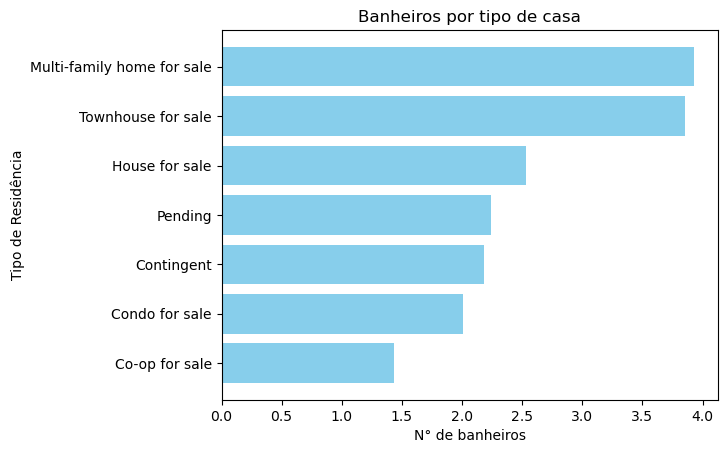

In [15]:
# Agrupando por tipo de residência e calculando a média de banheiros
bath_per_type = df.groupby('TYPE')['BATH'].mean().reset_index()  

# Ordenando os resultados para melhor visualização
bath_per_type = bath_per_type.sort_values('BATH', ascending=True)

fig, ax = plt.subplots()
ax.barh(bath_per_type['TYPE'], bath_per_type['BATH'], color='skyblue')

ax.set_ylabel('Tipo de Residência')
ax.set_xlabel('N° de banheiros')
ax.set_title('Banheiros por tipo de casa')

plt.show()

## Top 3 Types of houses with more bathrooms:
### Mult-Family 
### Townhouse => casas geminadas
### Mobile house => casas pré-fabricradas

#### Now we need to understand why

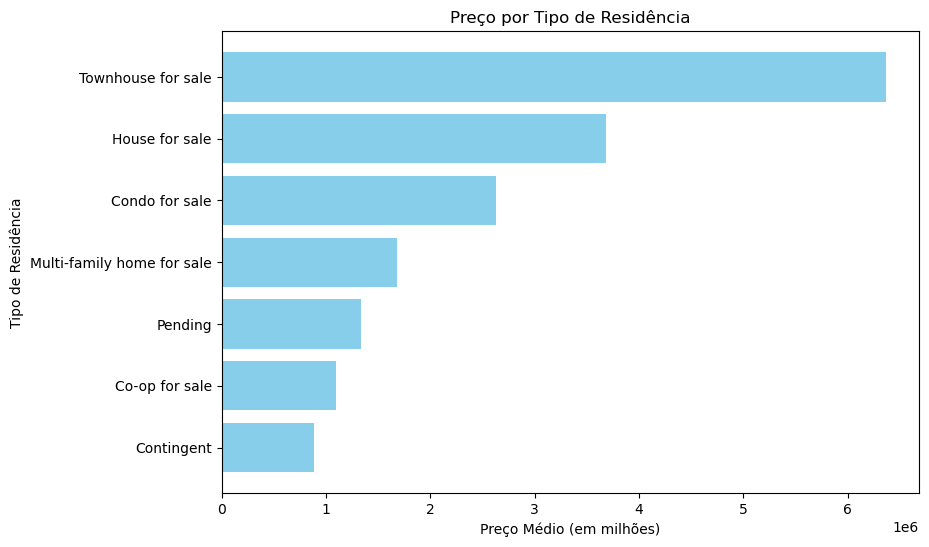

In [16]:
# Agrupando por tipo de residência e calculando a média de preços
price_per_type = df.groupby('TYPE')['PRICE'].mean().reset_index()

# Ordenando os resultados para melhor visualização
price_per_type = price_per_type.sort_values('PRICE', ascending=True)

fig, ax = plt.subplots(figsize=(9,6))
ax.barh(price_per_type['TYPE'], price_per_type['PRICE'], color='skyblue')

ax.set_xlabel('Preço Médio (em milhões)')
ax.set_ylabel('Tipo de Residência')
ax.set_title('Preço por Tipo de Residência')

plt.show()

The most expensive "houses" are not necessarily the ones with the most bathrooms, TownHouse (top 2 with the most bathrooms) is the most expensive, but the top 1 (multi-Family) has a common house price, it is worth remembering that this type of house houses more than one family and probably this type of house is in poorer regions (we will analyze this later).

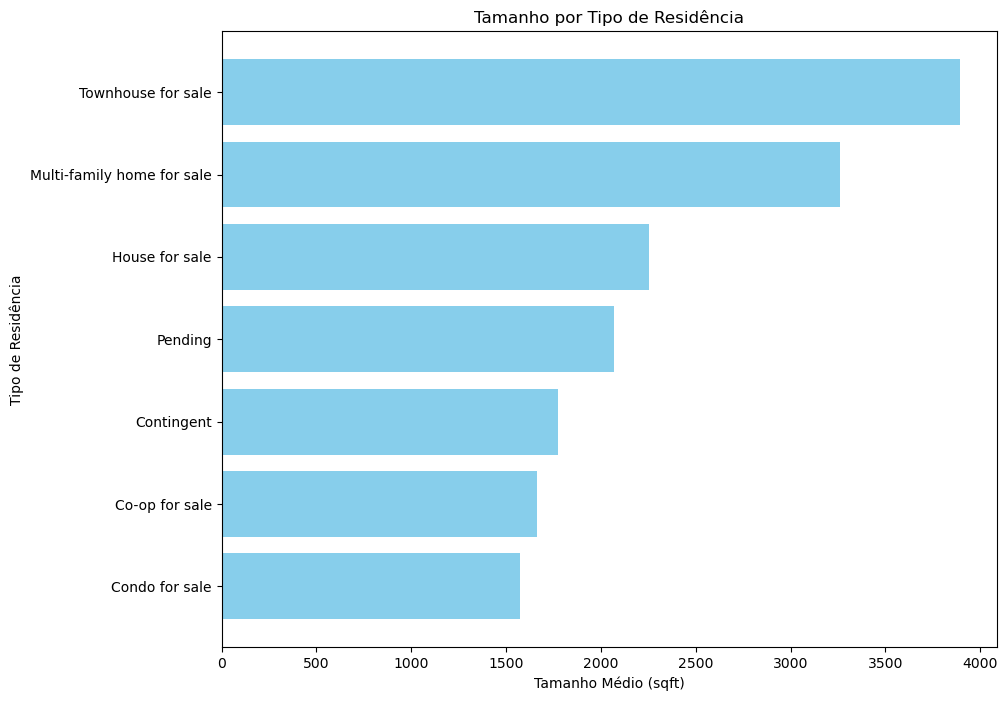

In [18]:
# Agrupando por tipo de residência e calculando a média do tamanho das propriedades
sqft_per_type = df.groupby('TYPE')['PROPERTYSQFT'].mean().reset_index()  

# Ordenando os resultados para melhor visualização
sqft_per_type = sqft_per_type.sort_values('PROPERTYSQFT', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8)) 
ax.barh(sqft_per_type['TYPE'], sqft_per_type['PROPERTYSQFT'], color= 'skyblue')

ax.set_ylabel('Tipo de Residência')
ax.set_xlabel('Tamanho Médio (sqft)')
ax.set_title('Tamanho por Tipo de Residência')

plt.show()

based on the 3 graphs above, we can take a simplistic view that:
multi-family houses obviously tend to be more expensive, have more bathrooms and are larger, TownHouses follow the same line, although probably the publics of these 2 types of houses have different per capita incomes.

# GeoPandas 

In [19]:
# precisamos converter LATITUDE e LONGITUDE em objetos Point, que são entendidos pelo GeoPandas
gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df.LONGITUDE, df.LATITUDE)])

# Definindo o sistema de coordenadas de referência (CRS) 
gdf.crs = "EPSG:4326"  # EPSG:4326 é o código para o CRS WGS84, usado para coordenadas GPS

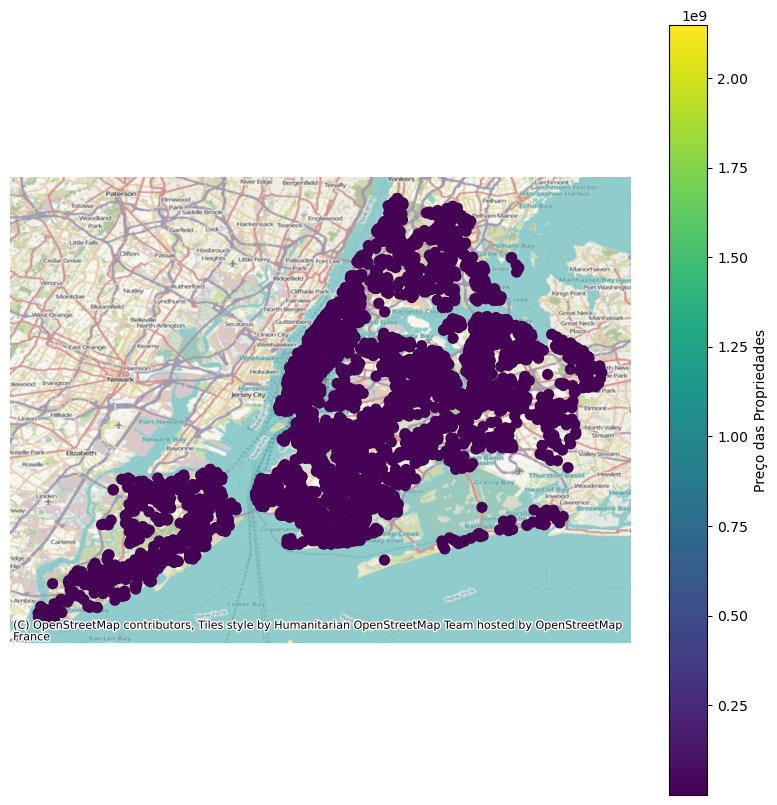

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='PRICE', legend=True, legend_kwds={'label': "Preço das Propriedades"}, markersize=50, cmap='viridis')

ctx.add_basemap(ax, crs=gdf.crs.to_string())
ax.set_axis_off()
plt.show()

In [22]:
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# tive alguns problemas em usar o ctx normal do gpd, por isso a atualização

<Figure size 640x480 with 0 Axes>

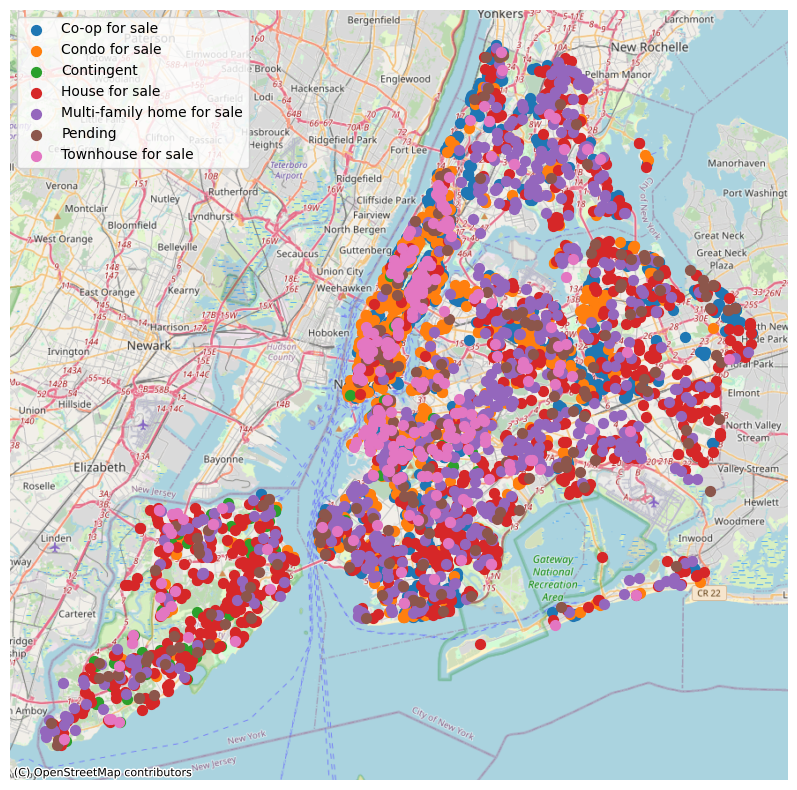

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

# Para cada tipo único de residência, plotar no mapa
for dtype, data in gdf.groupby('TYPE'):
    gdf_web_mercator = data.to_crs(epsg=3857)
    gdf_web_mercator.plot(ax=ax, marker='o', markersize=50, label=dtype)

# Atualizando para usar OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.legend()
plt.show()

#### with this type of graph we can understand a little about the geography of new york, obviously the area with the most townhouses is on manhattan island, the site of central park and the empire state building 

## SeaBorn

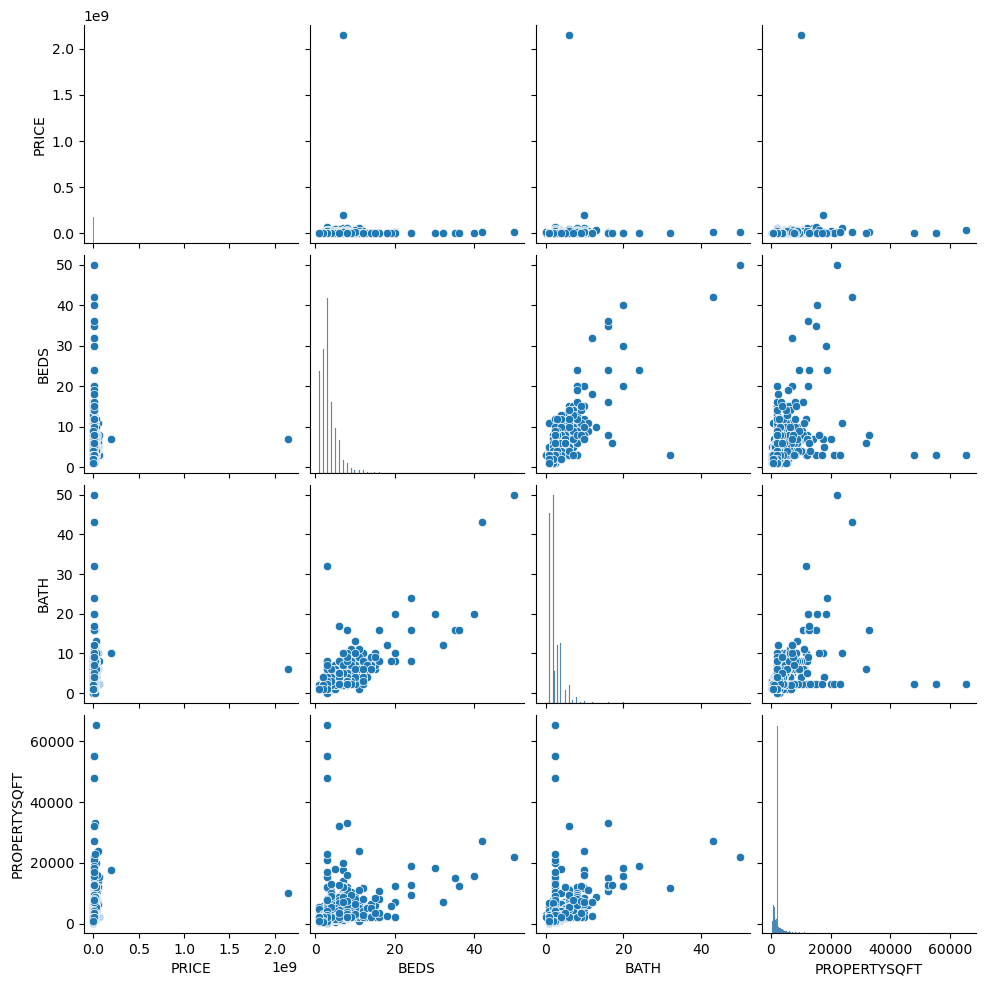

In [33]:
# Filtrando o DataFrame para incluir somente as colunas de interesse (numericas)
df_filtered = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]

# Removendo linhas com valores nulos nessas colunas para evitar erros no pairplot
df_filtered.dropna(subset=['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'], inplace=True)

# Gerando o pairplot
sns.pairplot(df_filtered)

<AxesSubplot:>

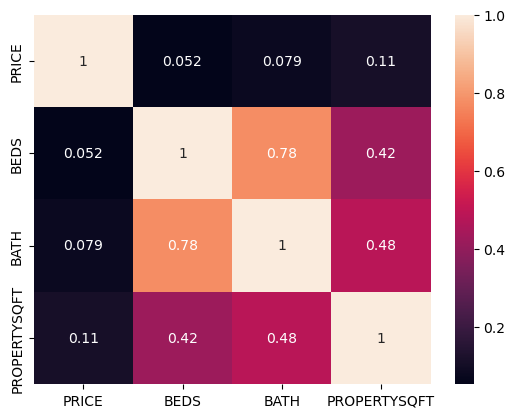

In [31]:
df_corr = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].dropna().corr()
sns.heatmap(df_corr, annot=True)

#### With heat map we can understand that beds and baths have a medium correlation, that can make some sense, of course you don't want a house with 5 bathrooms and 1 bedroom or 5 bedrooms and 1 bathroom